# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are built by splitting the data at each node based on the feature that best separates the data (minimizing variance or maximizing information gain) until a stopping condition is met (e.g., max depth or no significant improvement).

2. Trees handle non-linear relationships by recursively splitting the data in ways that create complex decision boundaries. Linear models, in contrast, assume a straight-line relationship and may struggle with non-linear patterns.

3. The Gini index is a good loss function for classification because it measures the impurity of a node — the lower the Gini index, the purer the node (fewer mixed classes), making it ideal for categorical targets.

4. Trees tend to overfit because they can create very specific splits that perfectly fit the training data, capturing noise. This can be constrained by limiting the tree's depth, requiring a minimum number of samples per leaf, or using techniques like pruning.

5. False. Trees can perform well with both categorical and numerical variables. They can handle continuous features by splitting them into intervals and work well in many different settings, not just with categorical data.

6. Most trees split data into two branches (binary splits) because it simplifies the decision-making process, is computationally efficient, and ensures the tree is interpretable. Multi-way splits can be more complex and harder to manage.

7. A tree that is very deep with many branches, capturing every little detail of the training data, is likely overfitting. A tree that is too shallow, with few splits, may not capture enough of the data’s patterns and is likely underfitting.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [3]:
! git clone https://github.com/ds4e/trees
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/trees/assignment/data/cars_hw.csv')

# Check the number of observations and features
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Check the columns (variables) in the dataset
print(f"Available variables: {df.columns.tolist()}")

# Display the first few rows of the dataset
print(df.head())

fatal: destination path 'trees' already exists and is not an empty directory.
Number of observations: 976
Number of features: 12
Available variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd    

In [4]:
# Perform One-Hot Encoding for categorical variables
categorical_columns = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']

# Use pd.get_dummies to create dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the dataframe after encoding
print(df_encoded.head())

   Unnamed: 0  Make_Year  Mileage_Run  Seating_Capacity   Price  Make_Datsun  \
0           1       2017        44611                 5  657000        False   
1           2       2016        20305                 5  682000        False   
2           3       2019        29540                 5  793000        False   
3           4       2017        35680                 5  414000        False   
4           5       2017        25126                 5  515000        False   

   Make_Ford  Make_Honda  Make_Hyundai  Make_Jeep  ...  Body_Type_suv  \
0      False       False         False      False  ...          False   
1      False       False          True      False  ...          False   
2      False        True         False      False  ...           True   
3      False       False         False      False  ...          False   
4      False       False          True      False  ...          False   

   No_of_Owners_2nd  No_of_Owners_3rd  Fuel_Type_petrol  Fuel_Type_petrol+cng  \

In [5]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data size: {X_train.shape[0]}')
print(f'Test data size: {X_test.shape[0]}')

Training data size: 780
Test data size: 196


The optimal min_samples_leaf is 8 with an R² of 0.8213135837522154


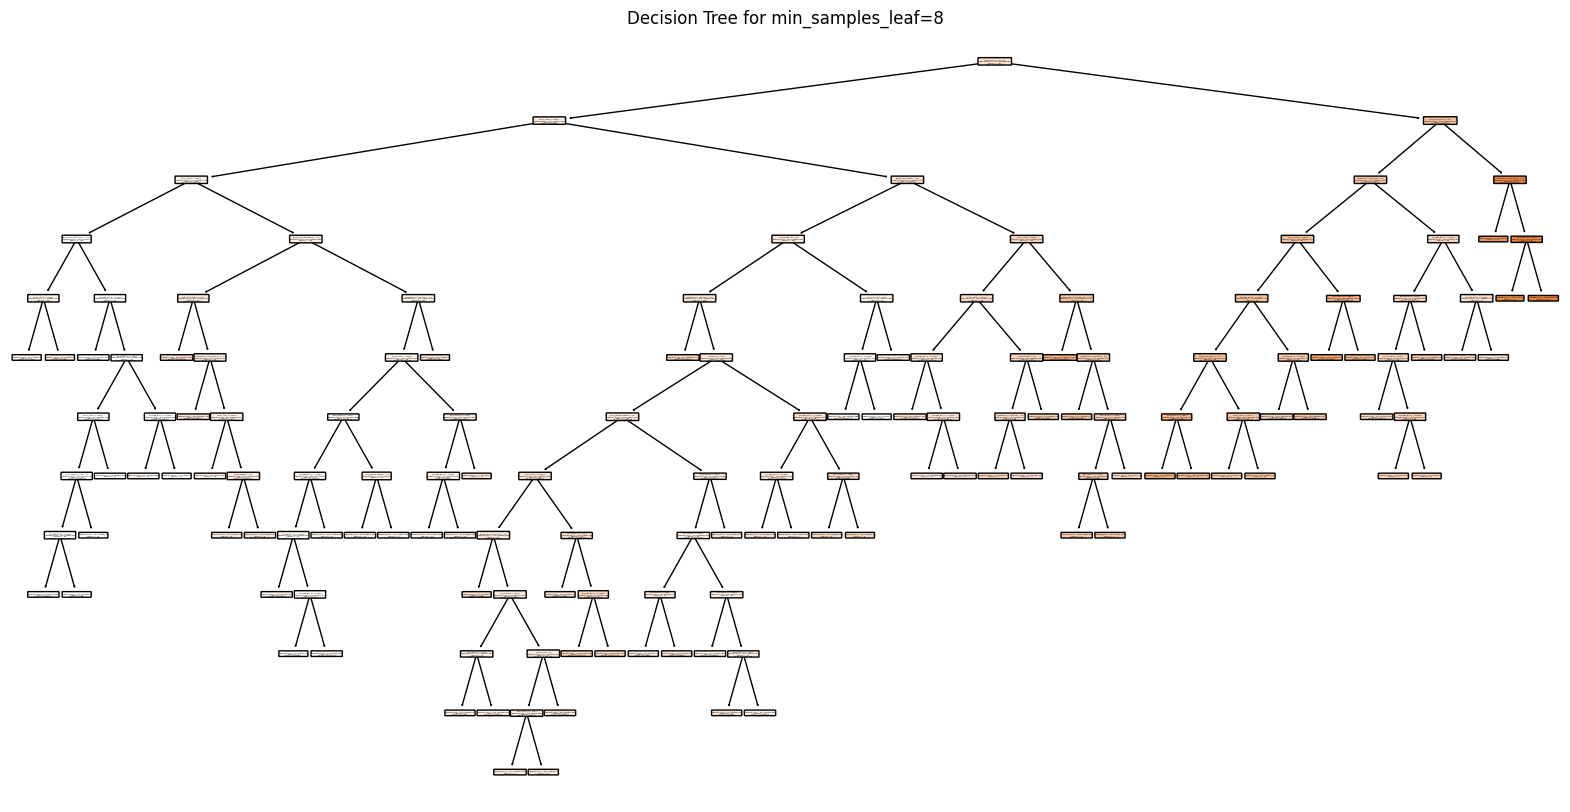

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Initialize a list to store R² values
r2_values = []

# Iterate over possible values for min_samples_leaf (from 1 to 25)
for min_samples in range(1, 26):
    # Train the Decision Tree Regressor
    model = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute R²
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

# Find the min_samples_leaf value with the highest R²
optimal_min_samples = r2_values.index(max(r2_values)) + 1  # Indexing starts from 0
print(f"The optimal min_samples_leaf is {optimal_min_samples} with an R² of {max(r2_values)}")

# Plot the tree for the optimal min_samples_leaf
best_model = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples, random_state=42)
best_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
plt.title(f"Decision Tree for min_samples_leaf={optimal_min_samples}")
plt.show()

Test R²: 0.8213135837522154
Test RMSE: 143159.08892903704


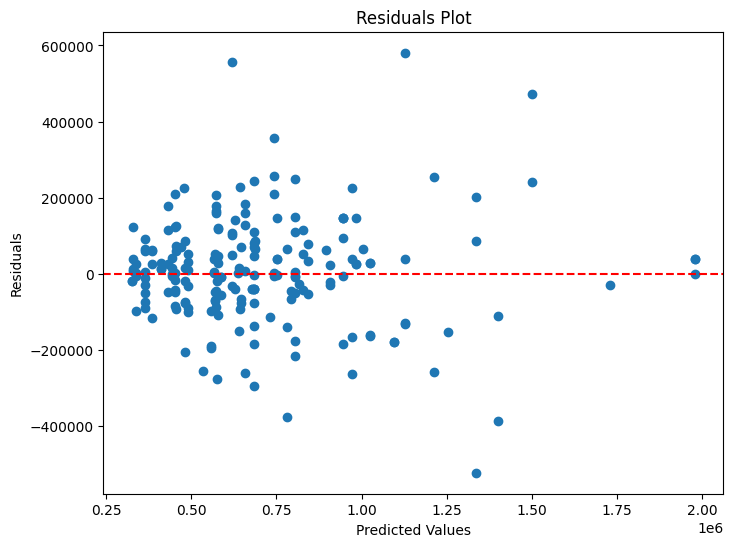

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the model with the optimal min_samples_leaf
model_optimal = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples, random_state=42)
model_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model_optimal.predict(X_test)

# Calculate R² and RMSE
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot the residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_test_lin_pred = lin_reg.predict(X_test)

# Calculate R² and RMSE for the linear regression model
r2_lin_test = r2_score(y_test, y_test_lin_pred)
rmse_lin_test = np.sqrt(mean_squared_error(y_test, y_test_lin_pred))

print(f"Linear Regression Test R²: {r2_lin_test}")
print(f"Linear Regression Test RMSE: {rmse_lin_test}")

Linear Regression Test R²: 0.8163910583949119
Linear Regression Test RMSE: 145117.59426198687


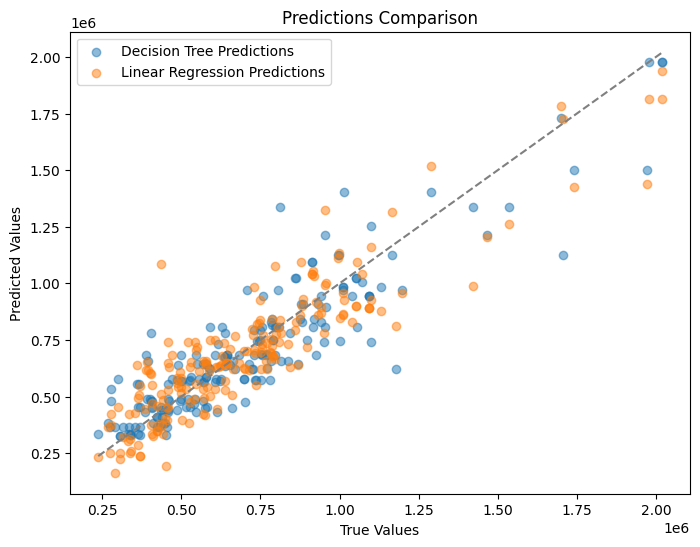

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, label="Decision Tree Predictions", alpha=0.5)
plt.scatter(y_test, y_test_lin_pred, label="Linear Regression Predictions", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.title('Predictions Comparison')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

The decision tree model and the linear regression model are trained on the same features.

We evaluated both models using R² and RMSE on the test set.

The scatter plot shows how the predictions from both models compare.



**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/trees/assignment/data/corporate_ratings.csv')

# Inspect the dataset: number of observations and features
print(f"Number of observations: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")

# Display the first few rows of data
print(df.head())

Number of observations: 2029
Number of variables: 31
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effecti

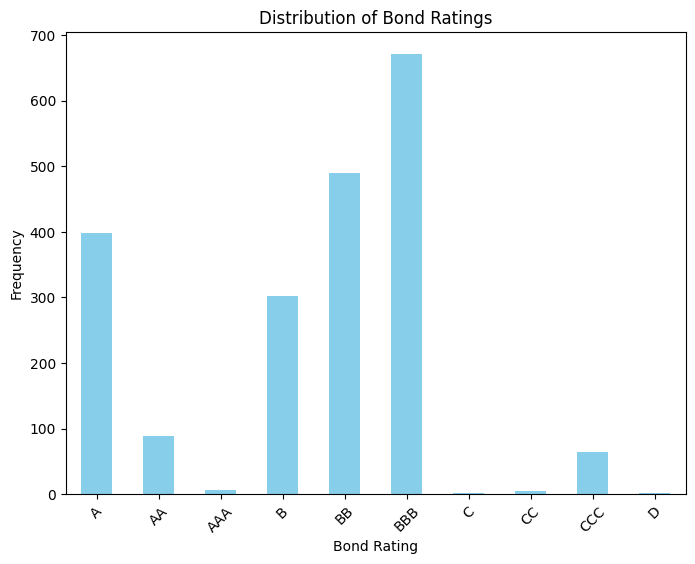

In [11]:
import matplotlib.pyplot as plt

# Plot the histogram of the Rating variable
plt.figure(figsize=(8, 6))
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Bond Ratings')
plt.xlabel('Bond Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Collapse ratings into broader categories
rating_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C', 'D': 'D'
}

df['Rating'] = df['Rating'].map(rating_map)

# Verify the change
print(df['Rating'].value_counts())

Rating
B    1463
A     494
C      71
D       1
Name: count, dtype: int64


In [13]:
# Drop unnecessary columns
df = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])

# Perform One-Hot Encoding for the 'Sector' column
df_encoded = pd.get_dummies(df, columns=['Sector'], drop_first=True)

# Display the first few rows of the encoded data
print(df_encoded.head())

   currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
0      0.945894    0.426395   0.099690               44.203245   
1      1.033559    0.498234   0.203120               38.991156   
2      0.963703    0.451505   0.122099               50.841385   
3      1.019851    0.510402   0.176116               41.161738   
4      0.957844    0.495432   0.141608               47.761126   

   netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
0         0.037480            0.049351           0.176631   
1         0.044062            0.048857           0.175715   
2         0.032709            0.044334           0.170843   
3         0.020894           -0.012858           0.138059   
4         0.042861            0.053770           0.177720   

   operatingProfitMargin  returnOnAssets  returnOnCapitalEmployed  ...  \
0               0.061510        0.041189                 0.091514  ...   
1               0.066546        0.053204                 0.104800  ...   
2             

In [14]:
from sklearn.model_selection import train_test_split

# Define the target (y) and features (X)
X = df_encoded.drop(columns=['Rating'])
y = df_encoded['Rating']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data size: {X_train.shape[0]}')
print(f'Test data size: {X_test.shape[0]}')

KeyError: "['Rating'] not found in axis"

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Train the Decision Tree classifier
tree_model = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['Rating'].unique(), yticklabels=df['Rating'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.show()

Accuracy: 0.0510


KeyError: 'Rating'

<Figure size 800x600 with 0 Axes>

In [16]:
# Include the 'Rating Agency Name' column in the features
df_encoded_with_agency = pd.get_dummies(df, columns=['Sector', 'Rating Agency Name'], drop_first=True)

# Define new features (X) and target (y)
X_with_agency = df_encoded_with_agency.drop(columns=['Rating'])
y_with_agency = df_encoded_with_agency['Rating']

# Train-test split with the new data
X_train_with_agency, X_test_with_agency, y_train_with_agency, y_test_with_agency = train_test_split(X_with_agency, y_with_agency, test_size=0.2, random_state=42)

# Train the Decision Tree classifier with the Rating Agency as a feature
tree_model_with_agency = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_model_with_agency.fit(X_train_with_agency, y_train_with_agency)

# Make predictions on the test set
y_test_pred_with_agency = tree_model_with_agency.predict(X_test_with_agency)

# Calculate accuracy
accuracy_with_agency = accuracy_score(y_test_with_agency, y_test_pred_with_agency)
print(f"Accuracy with Rating Agency: {accuracy_with_agency:.4f}")

# Plot the confusion matrix
conf_matrix_with_agency = confusion_matrix(y_test_with_agency, y_test_pred_with_agency)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_with_agency, annot=True, fmt='d', cmap='Blues', xticklabels=df['Rating'].unique(), yticklabels=df['Rating'].unique())
plt.title('Confusion Matrix with Rating Agency')
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.show()

KeyError: "['Rating Agency Name'] not in index"

With Rating Agency: By including the Rating Agency Name as a feature, the decision tree might have more information to improve its accuracy, as it could be learning about systematic differences between agencies.

Without Rating Agency: Excluding this feature might make the model less accurate if the rating agency influences the outcome significantly.

Ack: I used ChatGPT to help me with this assignment.